## Train/Test split

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [72]:
data=pd.read_csv("conversion_data.csv")
  
data

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


In [73]:
#There are only two invalid records. We can remove them.
data[data['age']>110]
data = data[data['age']<110]

In [74]:
#dummy variables for the categorical ones
data_dummy = pd.get_dummies(data, drop_first=True)
data_dummy

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,0,1,0,0,0
1,23,1,5,0,0,0,1,0,1
2,28,1,4,0,0,0,1,0,1
3,39,1,5,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
316195,26,1,9,0,0,0,1,0,0
316196,27,1,6,0,0,0,1,1,0
316197,25,0,4,0,0,0,0,0,0
316198,22,0,4,0,0,0,1,0,1


In [98]:
#split into train and test set
train, test = train_test_split(data_dummy, test_size = 0.2)

# logistic regression 

In [99]:
#add intercept
train_reg = train
test_reg = test

train_reg['intercept'] = 1
test_reg['intercept'] = 1
train_reg

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo,intercept
112790,23,1,9,0,0,0,0,0,1,1
119531,35,1,3,0,0,1,0,0,1,1
188906,47,1,8,0,0,0,1,0,0,1
142313,19,0,2,0,0,0,1,0,0,1
271874,21,0,10,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
75183,27,1,9,0,0,0,1,1,0,1
241753,23,0,2,0,0,0,0,1,0,1
279007,30,1,4,0,0,0,1,1,0,1
247380,31,1,4,0,0,1,0,0,1,1


In [100]:
train_cols = train_reg.drop('converted', axis=1)
test_cols = test_reg.drop('converted', axis=1)

In [101]:
logit = sm.Logit(train_reg['converted'], train_cols)
output = logit.fit()

Optimization terminated successfully.
         Current function value: 0.040372
         Iterations 11


In [102]:
output_table = pd.DataFrame(dict(coefficients = output.params, SE = output.bse, z = output.tvalues, p_values = output.pvalues))
#get coefficients and pvalues
print(output_table)

                     coefficients        SE           z       p_values
age                     -0.074074  0.002656  -27.888321  3.697136e-171
new_user                -1.745917  0.039942  -43.710822   0.000000e+00
total_pages_visited      0.760461  0.006976  109.018060   0.000000e+00
country_Germany          3.872288  0.148873   26.010617  3.755852e-149
country_UK               3.652342  0.135853   26.884585  3.326255e-159
country_US               3.321099  0.131801   25.197911  4.222555e-140
source_Direct           -0.217192  0.054706   -3.970187   7.181621e-05
source_Seo              -0.038201  0.044650   -0.855557   3.922430e-01
intercept              -10.409245  0.169426  -61.438412   0.000000e+00


In [103]:
print(output_table.loc[output_table['p_values'] < 0.05].sort_values("coefficients", ascending=False))

                     coefficients        SE           z       p_values
country_Germany          3.872288  0.148873   26.010617  3.755852e-149
country_UK               3.652342  0.135853   26.884585  3.326255e-159
country_US               3.321099  0.131801   25.197911  4.222555e-140
total_pages_visited      0.760461  0.006976  109.018060   0.000000e+00
age                     -0.074074  0.002656  -27.888321  3.697136e-171
source_Direct           -0.217192  0.054706   -3.970187   7.181621e-05
new_user                -1.745917  0.039942  -43.710822   0.000000e+00
intercept              -10.409245  0.169426  -61.438412   0.000000e+00


In [104]:
#train accuracy 
train_hat = output.predict(train_cols)
train_pred = list(map(round,train_hat))
(train_pred  == train_reg['converted']).sum()/len(train_reg['converted'])

0.9862902141857541

In [105]:
# test accuracy
test_hat = output.predict(test_cols)
test_pred = list(map(round,test_hat))
(test_pred == test_reg['converted']).sum()/len(test_reg['converted'])

0.9857685009487666

### conclusion 

- The large coefficients of country dummy variables are an result of taking China as reference level. It is clear from exploratory data analysis that China has a much lower conversion rate compared to other countries
- The test accuracy and train accuracy are similar so there is no need to use regularization. With regularization, we can indeed increase model performance by a little bit, but the focus of this project is to extract insights from data, not to get best possible predictions.
- total_pages_visited is also an important one. Unfortunately, it is probably the least “actionable”. People visit many pages because they already want to buy. Also, in order to buy, you have to click on multiple pages. We should rebuild the model without total_pages_visited 
- Using logistic regression, we are able to improve the prediction accuracy from 97% to approximately 98.5%. However, logistic regression cannot explore non-linear relationship. It is unlikely that continuous variable such as age has a monotonic relationship with the target variable
- To explore non-linear relationship as well as identify the most marketable segments, we will use tree-based method next.


## random forest 

In [106]:
#build the model
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True)
rf.fit(train.drop('converted', axis=1), train['converted'])
  
#OOB accuracy and confusion matrix
print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(train['converted'], rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
)

OOB accuracy is 0.984467777259466 
 OOB Confusion Matrix 
         0     1
0  243595  1244
1    2685  5434


In [107]:
#OOB error and test error are pretty similar, ~1.5%. We are confident we are not overfitting.
print(
"Test accuracy is", rf.score(test.drop('converted', axis=1),test['converted']), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(test['converted'], rf.predict(test.drop('converted', axis=1)), labels=[0, 1]))
)

Test accuracy is 0.9842504743833017 
 Test Set Confusion Matrix 
        0     1
0  60850   311
1    685  1394


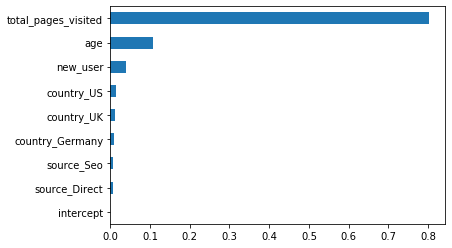

In [108]:
feat_importances = pd.Series(rf.feature_importances_, index=train.drop('converted', axis=1).columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

The result confirms the conclusion from logistic regression. Total pages visited is the most important one. Unfortunately, it is probably the least “actionable”. We should rebuild the RF without that variable. Since classes are heavily unbalanced and we don’t have that very powerful variable anymore, let’s change the weights, just to make sure we will get something classified as 1

In [109]:
#build the model without total_pages_visited
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True, class_weight={0:1, 1:10})
rf.fit(train.drop(['converted', 'total_pages_visited'], axis=1), train['converted'])
  
#let's print OOB accuracy and confusion matrix
print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(train['converted'], rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
)

OOB accuracy is 0.8902821812316669 
 OOB Confusion Matrix 
         0      1
0  221636  23203
1    4551   3568


In [110]:
#and let's print test accuracy and confusion matrix
print(
"Test accuracy is", rf.score(test.drop(['converted', 'total_pages_visited'], axis=1),test['converted']), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(test['converted'], rf.predict(test.drop(['converted', 'total_pages_visited'], axis=1)), labels=[0, 1]))
)

Test accuracy is 0.8931372549019608 
 Test Set Confusion Matrix 
        0     1
0  55557  5604
1   1154   925


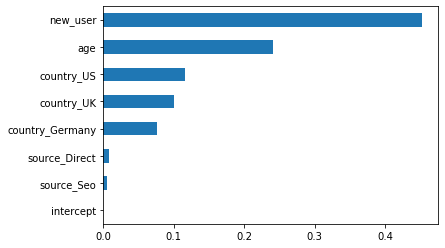

In [111]:
feat_importances = pd.Series(rf.feature_importances_, index=train.drop(['converted', 'total_pages_visited'], axis=1).columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

New user is the most important one, even more important than age. And that’s impressive given that continuous variables tend to always show up at the top in RF variable importance plots. It means new_user is really important. Source-related dummies don’t seem to matter at all.



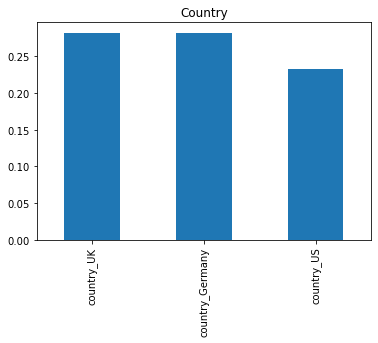

In [112]:
from pdpbox import pdp, info_plots
  
#country
pdp_iso = pdp.pdp_isolate( model=rf, 
                          dataset=train.drop(['converted', 'total_pages_visited'], axis=1),      
                          model_features=list(train.drop(['converted', 'total_pages_visited'], axis=1)), 
                          feature=['country_Germany', 'country_UK', 'country_US'], 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='Country')
plt.show()

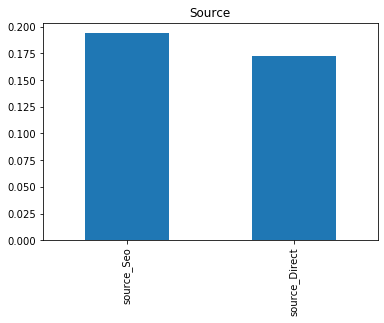

In [113]:
#source
pdp_iso = pdp.pdp_isolate( model=rf, 
                          dataset=train.drop(['converted', 'total_pages_visited'], axis=1),      
                          model_features=list(train.drop(['converted', 'total_pages_visited'], axis=1)), 
                          feature=['source_Direct', 'source_Seo'], 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='Source')
plt.show()

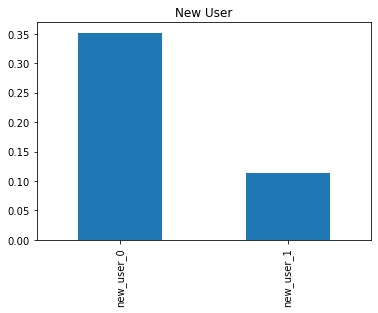

In [114]:
#new user
pdp_iso = pdp.pdp_isolate( model=rf, 
                          dataset=train.drop(['converted', 'total_pages_visited'], axis=1),      
                          model_features=list(train.drop(['converted', 'total_pages_visited'], axis=1)), 
                          feature='new_user', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='New User')
plt.show()

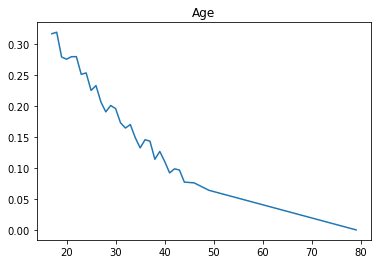

In [115]:
#age
pdp_iso = pdp.pdp_isolate( model=rf, 
                          dataset=train.drop(['converted', 'total_pages_visited'], axis=1),      
                          model_features=list(train.drop(['converted', 'total_pages_visited'], axis=1)), 
                          feature='age', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.feature_grids)
pdp_dataset.plot(title='Age')
plt.show()

### Conclusion
- Returning users  are much better than new users

- Germany, UK, and US are similar, with Germany being the best. Most importantly, they all have very very high values. We could read this as relative to the reference level, which is China. So this means that not being from China and being from any of those 3 countries significantly increases the probability of conversion. That is, China is very bad for conversion

- The site works very well for young people and gets worse for >30 yr old

- Source is less relevant

In [116]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn import tree


In [117]:
dt = DecisionTreeClassifier( max_depth=2,class_weight={0:1, 1:10}, min_impurity_decrease = 0.001)
dt.fit(train.drop(['converted', 'total_pages_visited'], axis=1), train['converted'])

DecisionTreeClassifier(class_weight={0: 1, 1: 10}, max_depth=2,
                       min_impurity_decrease=0.001)

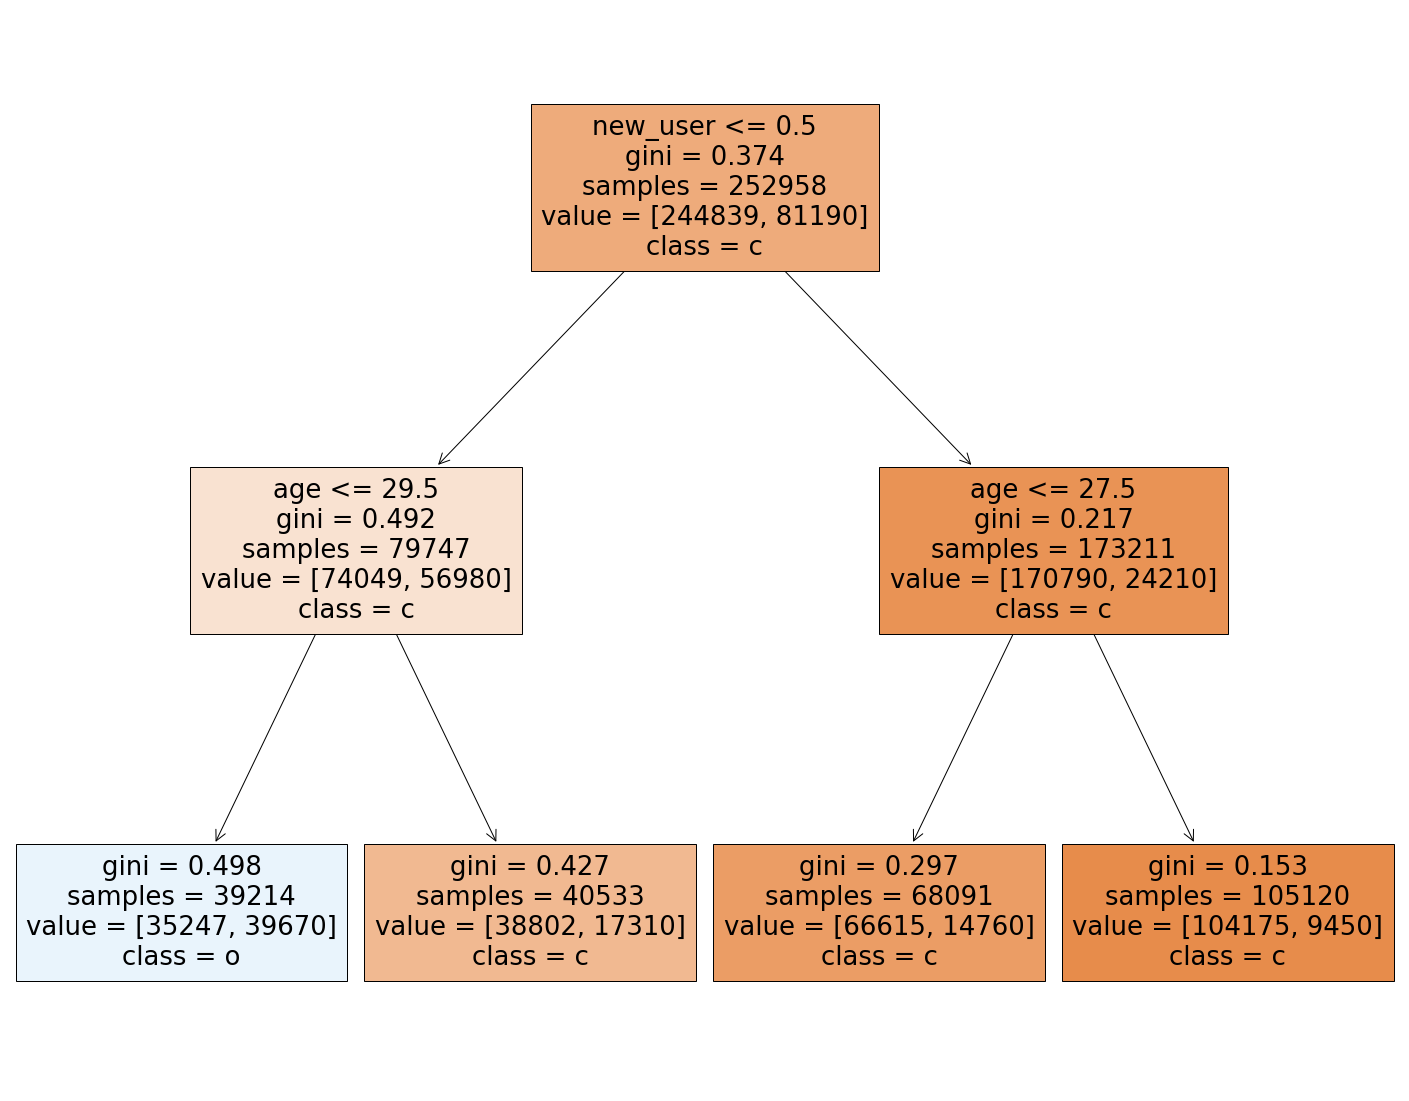

In [118]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=train.drop(['converted', 'total_pages_visited'], axis=1).columns,  
                   class_names='converted',
                   filled=True)

### conclusion 

- The site is working very well for young users. Try to advertise and use channels which are more likely to reach young people.

- The site is working very well for Germany in terms of conversion. But the summary showed that there are few Germans coming to the site: way less than UK, despite a larger population. Again, marketing should get more Germans. Big opportunity.

- Users with old accounts do much better. Targeted emails with offers to bring them back to the site could be a good idea to try.

- Maybe go through the UI and figure out why older users perform so poorly? From ~30 y/o conversion clearly starts dropping. A good actionable metric here is conversion rate for people >=30 yr old. Building a team whose goal is to increase that number would be interesting.

- Something is wrong with the Chinese version of the site. It is either poorly translated, doesn’t fit the local culture, or maybe some payment issue. Given how many users are based in China, fixing this should be a top priority. Huge opportunity.
